In [2]:
# Import Splinter, BeautifulSoup, Regular Expression, and Time
from splinter import Browser
from bs4 import BeautifulSoup as bs
import pandas as pd
import re
import time
import wget
import numpy as np
import matplotlib.pyplot as plt


In [13]:
executable_path = {'executable_path': 'C:/Users/renie/Desktop/chromedriver.exe'}

browser = Browser('chrome', **executable_path)

In [40]:
months = ["january","march","april","may","june","july","august","september",\
          "october","november","december"]

download_directory = "2019/"
csv_files = []

for month in months:
    url = "https://opendata.dc.gov/datasets/moving-violations-issued-in-" + month + "-2019/data"
    #print(url)
    browser.visit(url)
    time.sleep(2)

    browser.is_element_present_by_text("Spreadsheet", wait_time=1)
    html = browser.html
    violations_soup = bs(html, 'html.parser')
    #violations_soup
    
    link_info = violations_soup.find("a", id="ember104")
    link = link_info['href']
    filename = link_info['download']
    
    csv_files.append(filename)
    print(link)
    print(filename)
#     print()

    download = wget.download(link, out=download_directory)
    print(download)
    
    time.sleep(10)

NameError: name 'browser' is not defined

In [41]:
column_names = ["ISSUE_DATE","VIOLATION_PROCESS_DESC","DRV_LIC_STATE","FINE_AMOUNT"]

y2019_df = pd.DataFrame(columns = column_names)
print(y2019_df)

first_month = "True"

months = ["January","March","April","May","June","July","August","September",\
          "October","November","December"]

csv_files = []

for month in months:
    filename = "Moving_Violations_Issued_in_" + month + "_2019.csv"
    csv_files.append(filename)

# Make sure the sub-folder name is 2019; otherwise, change it.
for file in csv_files:
    file_path = "2019/" + file
    print(file_path)
    
    month_df = pd.read_csv(file_path)
    
    temp_df = month_df.loc[:,["ISSUE_DATE","VIOLATION_PROCESS_DESC","DRV_LIC_STATE","FINE_AMOUNT"]]
    temp_df = temp_df[temp_df['DRV_LIC_STATE'].isin(["DC","MD","VA"])==True]
    temp_df.dropna(subset=["DRV_LIC_STATE"]) 
    
    if first_month == "True":
        y2019_df = temp_df 
        first_month = "False"
    else:    
        csv_df = pd.concat([y2019_df, temp_df])
        y2019_df = csv_df
        #break
    
y2019_df.to_csv("2019/final.csv")      

Empty DataFrame
Columns: [ISSUE_DATE, VIOLATION_PROCESS_DESC, DRV_LIC_STATE, FINE_AMOUNT]
Index: []
2019/Moving_Violations_Issued_in_January_2019.csv


C:\Users\renie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


2019/Moving_Violations_Issued_in_March_2019.csv
2019/Moving_Violations_Issued_in_April_2019.csv
2019/Moving_Violations_Issued_in_May_2019.csv
2019/Moving_Violations_Issued_in_June_2019.csv
2019/Moving_Violations_Issued_in_July_2019.csv
2019/Moving_Violations_Issued_in_August_2019.csv
2019/Moving_Violations_Issued_in_September_2019.csv
2019/Moving_Violations_Issued_in_October_2019.csv
2019/Moving_Violations_Issued_in_November_2019.csv
2019/Moving_Violations_Issued_in_December_2019.csv


In [42]:
y2019_df["YEAR"] = y2019_df['ISSUE_DATE'].str.split('/').str[0]
y2019_df["MONTH"] = y2019_df['ISSUE_DATE'].str.split('/').str[1]

y2019_df.sample(5)

,ISSUE_DATE,VIOLATION_PROCESS_DESC,DRV_LIC_STATE,FINE_AMOUNT,YEAR,MONTH
58235,2019/11/17 05:00:00+00,SPEED 11-15 MPH OVER THE SPEED LIMIT,DC,200.0,2019,11
9474,2019/12/24 05:00:00+00,FAIL TO STOP PER REGULATIONS FACING RED SIGNAL,DC,150.0,2019,12
6635,2019/11/01 04:00:00+00,TURN RIGHT ON RED WITHOUT COMPLETE STOP,DC,100.0,2019,11
23117,2019/01/03 05:00:00+00,SPEED 11-15 MPH OVER THE SPEED LIMIT,DC,100.0,2019,01
9876,2019/01/14 05:00:00+00,TURN RIGHT ON RED WITHOUT COMPLETE STOP,DC,100.0,2019,01


### Question 6 - Total amount of issuing violations by State and Month

In [4]:
amount = y2019_df.groupby("DRV_LIC_STATE")['FINE_AMOUNT'].sum().map("${:,.1f}".format)

amount.to_frame()

amount.reset_index()

,DRV_LIC_STATE,FINE_AMOUNT
0,DC,"$25,105,850.0"
1,MD,"$3,502,470.0"
2,VA,"$1,287,157.0"


Text(0.0, 1.0, 'Total Fines Issued to DC, MD & VA for 2019')

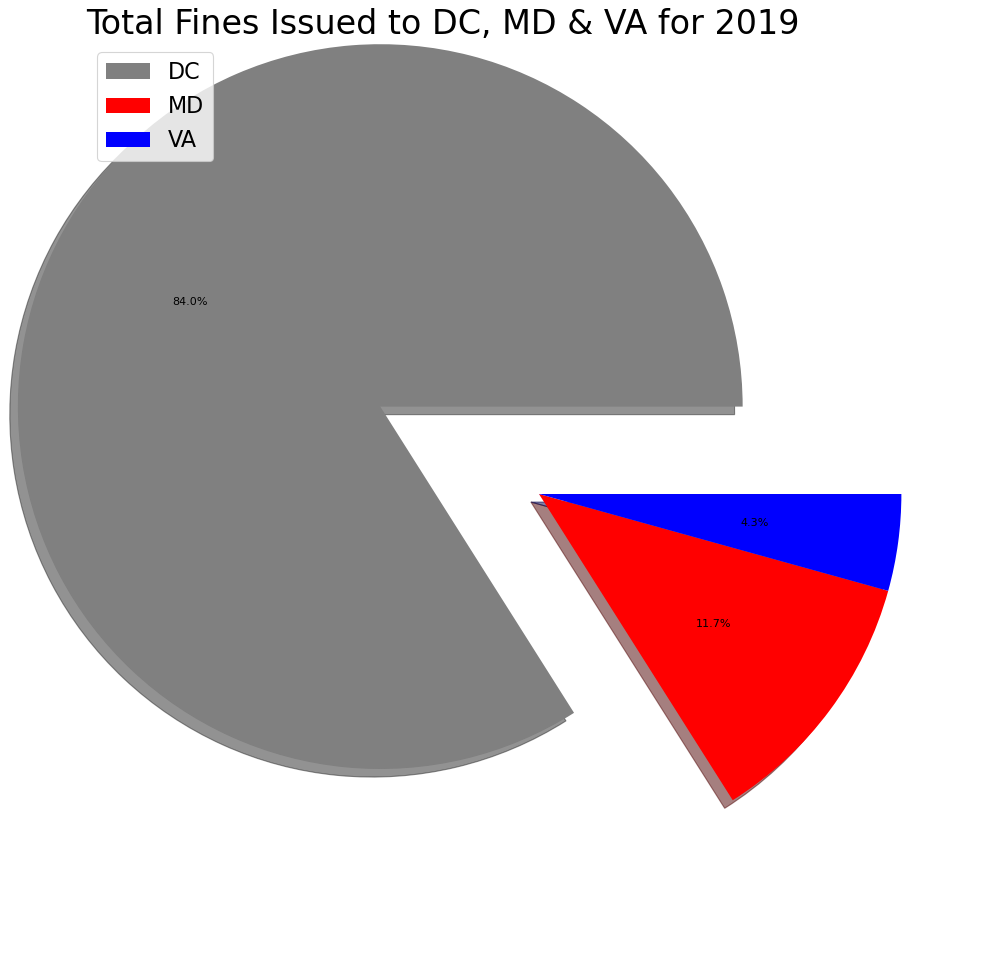

In [38]:

tasks = [25105850.0, 3502470.0, 1287157.0]
sizes = [220, 95, 80]
colors = ['gray', 'red', 'blue']
explode = (0.5, 0, 0)
plt.figure(figsize=(15,15), dpi=80)
plt.pie(tasks, explode=explode, shadow=True, colors=colors, autopct='%.1f%%' )
plt.legend(labels= ['DC','MD', 'VA'],loc=2, fontsize=20)
plt.title('Total Fines Issued to DC, MD & VA for 2019',loc="left", fontsize=30)


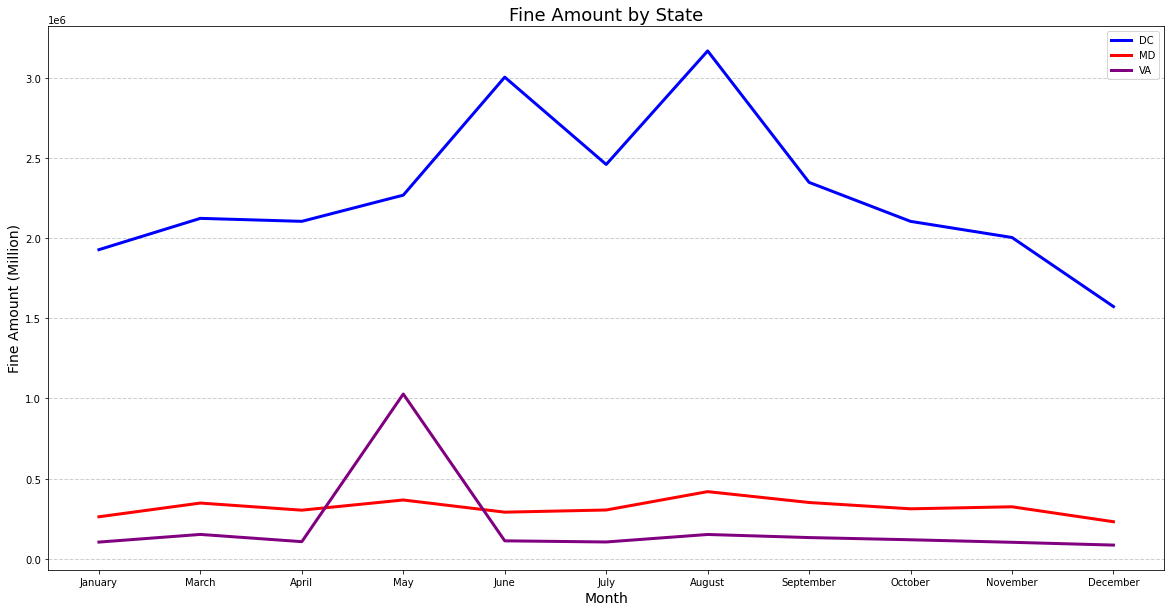

In [15]:
x_axis = ('January', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')
x_axis
District = [1929450.0, 2125015.0, 2106375.0, 2270000.0, 3007080.0, 2461670.0, 3170890.0, 2349595.0, 2106245.0, 2005436.0, 1574094.0]
Maryland = [261086.0, 346831.0, 302362.0, 365972.0, 289874.0, 303418.0, 418166.0, 350287.0, 310869.0, 323488.0, 230117.0]
Virginia = [103030.0, 150855.0, 105652.0, 1027890.0, 110821.0, 103686.0, 150490.0, 131241.0, 117500.0, 101750.0, 84242.0]

plt.figure(figsize=(20, 10))
first = plt.plot(x_axis, District, linewidth=3, color='blue', label='DC')
second = plt.plot(x_axis, Maryland, linewidth=3, color='red', label='MD')
third = plt.plot(x_axis, Virginia, linewidth=3, color='purple', label='VA')

plt.legend(loc='best')
plt.grid(color='#95A5A6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Fine Amount (Million)', fontsize=14)
plt.title('Fine Amount by State', fontsize=18)
plt.show()


In [14]:
total_amount = y2019_df.groupby(["DRV_LIC_STATE", "MONTH"])['FINE_AMOUNT'].sum().map("${:,.1f}".format)

total_amount.to_frame()

FINE_AMOUNT
DRV_LIC_STATE MONTH              
DC            01     $1,929,450.0
              03     $2,125,015.0
              04     $2,106,375.0
              05     $2,270,000.0
              06     $3,007,080.0
              07     $2,461,670.0
              08     $3,170,890.0
              09     $2,349,595.0
              10     $2,106,245.0
              11     $2,005,436.0
              12     $1,574,094.0
MD            01       $261,086.0
              03       $346,831.0
              04       $302,362.0
              05       $365,972.0
              06       $289,874.0
              07       $303,418.0
              08       $418,166.0
              09       $350,287.0
              10       $310,869.0
              11       $323,488.0
              12       $230,117.0
VA            01       $103,030.0
              03       $150,855.0
              04       $105,652.0
              05       $127,890.0
              06       $110,821.0
              07       $103,686.0
              08       $150,490.0
              09       $131,241.0
              10       $117,500.0
              11       $101,750.0
              12        $84,242.0

Text(0.0, 1.0, 'Total Percent of Violations Issued to DC, MD & VA for 2019')

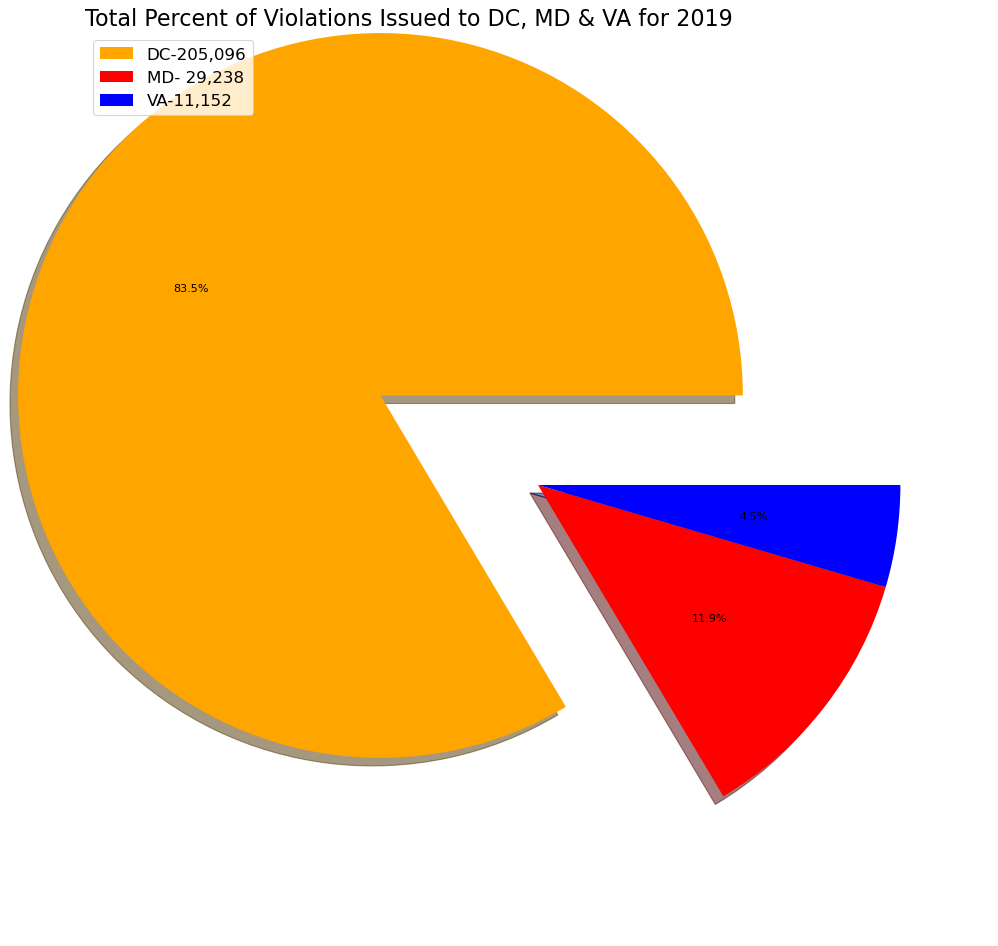

In [37]:
tasks = [205096, 29238, 11152]
sizes = [220, 95, 80]
colors = ['orange', 'red', 'blue']
explode = (0.5, 0, 0)
plt.figure(figsize=(15,15), dpi=80)
plt.pie(tasks, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%')
plt.legend(labels= ['DC-205,096','MD- 29,238', 'VA-11,152'],loc=2, fontsize= 15)
plt.title('Total Percent of Violations Issued to DC, MD & VA for 2019',loc="left", fontsize=20)

In [9]:
violation_amount = y2019_df.groupby("DRV_LIC_STATE")['DRV_LIC_STATE'].count()
violation_amount.to_frame()

,DRV_LIC_STATE
DRV_LIC_STATE,
DC,205096
MD,29238
VA,11152


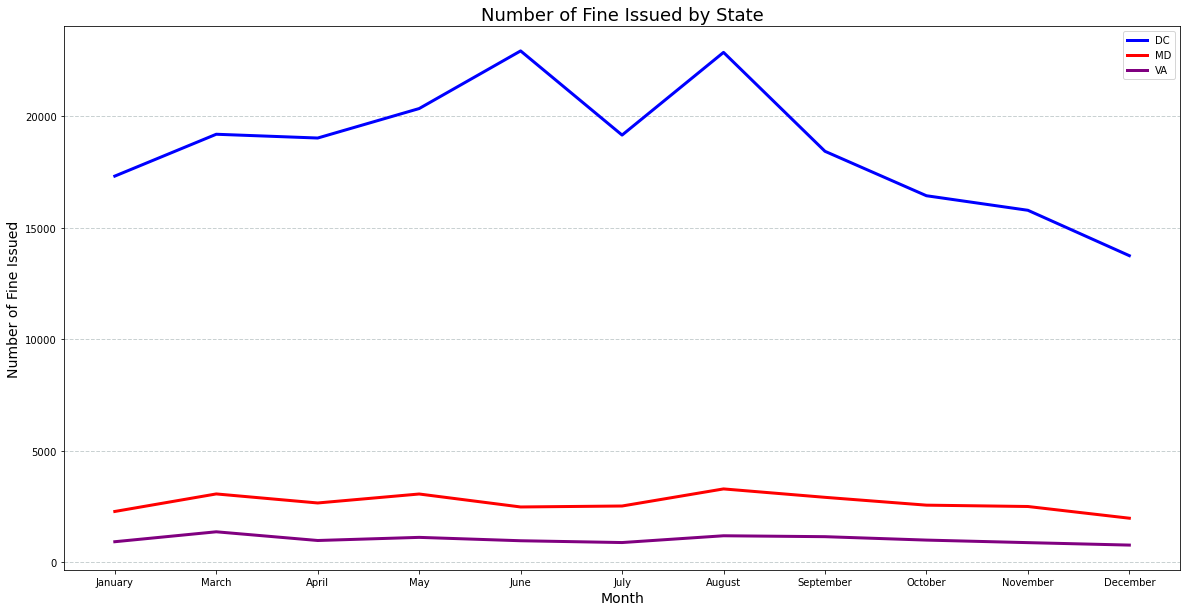

In [8]:
x_axis = ('January', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')
x_axis
District = [17305 ,19181, 19012, 20333, 22917, 19144, 22851, 18417, 16425, 15773, 13738]
Maryland = [2272, 3058, 2653, 3055, 2474, 2517, 3283, 2906, 2555, 2495, 1970]
Virginia = [916, 1361, 971, 1111, 960, 879, 1183, 1142, 989, 875, 765]

plt.figure(figsize=(20, 10))
first = plt.plot(x_axis, District, linewidth=3, color='blue', label='DC')
second = plt.plot(x_axis, Maryland, linewidth=3, color='red', label='MD')
third = plt.plot(x_axis, Virginia, linewidth=3, color='purple', label='VA')

plt.legend(loc='best')
plt.grid(color='#95A5A6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Violations Issued', fontsize=14)
plt.title('Number of Violations Issued by State', fontsize=18)
plt.show()

In [10]:
violation_amount = y2019_df.groupby(["DRV_LIC_STATE", "MONTH"])['DRV_LIC_STATE'].count()
violation_amount.to_frame()

DRV_LIC_STATE
DRV_LIC_STATE MONTH               
DC            01             17305
              03             19181
              04             19012
              05             20333
              06             22917
              07             19144
              08             22851
              09             18417
              10             16425
              11             15773
              12             13738
MD            01              2272
              03              3058
              04              2653
              05              3055
              06              2474
              07              2517
              08              3283
              09              2906
              10              2555
              11              2495
              12              1970
VA            01               916
              03              1361
              04               971
              05              1111
              06               960
              07               879
              08              1183
              09              1142
              10               989
              11               875
              12               765

In [47]:
y2019_df["VIOLATION_PROCESS_DESC"].value_counts()

SPEED 11-15 MPH OVER THE SPEED LIMIT                131347
SPEED 16-20 MPH OVER THE SPEED LIMIT                 21434
PASSING STOP SIGN WITHOUT COMING TO A FULL STOP      16890
FAIL TO STOP PER REGULATIONS FACING RED SIGNAL       12516
FAIL TO DISPLAY PROOF OF VEHICLE INSURANCE            5343
                                                     ...  
FAILURE TO YEILD ROW  TO TRANSIT BUS                     1
VIOLATION OF SNOW EMERGENCY PARKING REGULATIONS          1
FAIL TO PROCEED WITH CAUTION THROUGH AN INCIDENT         1
PASS ON A HILL                                           1
INTERFERE WITH A TRAFFIC SIGNAL DEVICE                   1
Name: VIOLATION_PROCESS_DESC, Length: 251, dtype: int64

In [13]:
violation = y2019_df.groupby("DRV_LIC_STATE")['VIOLATION_PROCESS_DESC'].value_counts()

violation.to_frame()


VIOLATION_PROCESS_DESC
DRV_LIC_STATE VIOLATION_PROCESS_DESC                                                    
DC            SPEED 11-15 MPH OVER THE SPEED LIMIT                                128150
              SPEED 16-20 MPH OVER THE SPEED LIMIT                                 19067
              PASSING STOP SIGN WITHOUT COMING TO A FULL STOP                      13975
              FAIL TO STOP PER REGULATIONS FACING RED SIGNAL                       10269
              TURN RIGHT ON RED WITHOUT COMPLETE STOP                               4746
              SPEED 21-25 MPH OVER THE SPEED LIMIT                                  3254
              FAIL TO DISPLAY PROOF OF VEHICLE INSURANCE                            2816
              OWNER OPERATE OR PERMIT OPERATION OF UNINSRD VEH                      2405
              DISOBEY TRAFFIC CONTROL DEVICE                                        1636
              DISTRACTED DRIVING USING CELL PHONE, OTHER DEVICE                     1033
              SEAT BELT REGULATION VIOLATION                                         888
              FAIL TO EXHIBIT REGISTRATION                                           869
              VIOLATION OF TINTED WINDOWS REGULATIONS                                830
              FAIL TO DISPLAY CURRENT INSPECTION STICKER                             696
              TURNING LEFT WHERE LEFT TURNS ARE PROHIBITED                           695
              ONE RUNNING LIGHT                                                      690
              FAIL TO PAY ATTENTION WHILE OPERATING A VEHICLE                        671
              SPEED 26-30 MPH OVER THE SPEED LIMIT                                   640
              UNREGISTERED VEHICLE, MORE THAN 30 DAYS                                562
              FAIL TO EXHIBIT DRIVER'S LICENSE OR PERMIT                             541
              DEAD OR EXPIRED TAGS                                                   462
              FAIL TO KEEP IN LANE                                                   451
              NO LIGHTS RUNNING ON VEHICLE                                           415
              FAIL TO YIELD RIGHT OF WAY                                             407
              MAKING A TURN FROM THE WRONG LANE                                      346
              FAIL TO GIVE HAND OR MECHANICAL TURN SIGNAL                            327
              NO FRONT TAGS                                                          257
              FOLLOW A VEHICLE TOO CLOSELY                                           254
              OVER 25 MPH IN EXCESS OF LIMIT ON NON-CONTROLLED A                     252
              CHANGE LANES WITHOUT CAUTION                                           243
              SPEED UP TO TEN MPH OVER THE SPEED LIMIT                               238
              FAIL TO CONTROL VEHICLE SPEED TO AVOID COLLIDING                       236
              DRIVING ON THE WRONG SIDE OF THE STREET                                235
              RIGHT TURN ON RED, VIOLATION NO TURN ON RED SIGN                       225
              MAKING A U TURN WHERE U TURNS ARE PROHIBITED                           222
              FAIL TO HAVE LICENSE                                                   208
              DISOBEYING OFFICIAL TRAFFIC CONTROL DEVICE                             207
              BUS LANE, UNAUTHRIZED DRIVING IN A                                     205
              FAIL TO SECURE DC TAGS                                                 205
              FAIL TO DISPLAY CURRENT TAGS                                           200
              UNREGISTERED VEHICLE 30 DAYS OR LESS                                   193
              PASSING A YELLOW TRAFFIC SIGNAL                                        187
              FAIL TO YIELD TO PEDESTRIAN AT NON-SIGNALIZED SITE                     186
              NO STOP LIGHT(S)                               

In [10]:
# show all rows in a DataFrame
pd.set_option('display.max_rows', None)

In [10]:

violations = y2019_df.groupby(["DRV_LIC_STATE", "YEAR" , "MONTH"])['VIOLATION_PROCESS_DESC'].value_counts()

violations.to_frame()

VIOLATION_PROCESS_DESC
DRV_LIC_STATE YEAR MONTH VIOLATION_PROCESS_DESC                                                 
DC            2019 01    SPEED 11-15 MPH OVER THE SPEED LIMIT                              11157
                         SPEED 16-20 MPH OVER THE SPEED LIMIT                               1586
                         FAIL TO STOP PER REGULATIONS FACING RED SIGNAL                      937
                         PASSING STOP SIGN WITHOUT COMING TO A FULL STOP                     870
                         TURN RIGHT ON RED WITHOUT COMPLETE STOP                             420
...                                                                                          ...
VA            2019 12    PASSING IN AN INTERSECTION                                            1
                         PERMIT USE OF EXPIRED TAGS                                            1
                         POORLY ILLUMINATED TAGS                                               1
                         SEAT BELT REGULATION MULTIPLE VIOLATIONS                              1
                         VIOLATION OF RESTRICTION ON LEARNER'S PERMIT                          1

[3910 rows x 1 columns]

In [ ]:
# df.head(5).plot(kind='barh', x='what the x axis should be', y='what the y axis should be', legend=False, color='green', edgecolor = 'black', figsize=(10,5), fontsize=11)
# plt.ylabel('y axis title', fontsize=12)
# plt.xlabel('x axis title', fontsize=12)
# plt.grid(color='#95A5A6', linestyle='--', linewidth=2, axis='x', alpha=0.5)
# plt.title('chart title', fontsize=14)

In [55]:
DC_df = y2019_df.loc[:,["ISSUE_DATE","VIOLATION_PROCESS_DESC","DRV_LIC_STATE","FINE_AMOUNT"]]
DC_df = DC_df[DC_df['DRV_LIC_STATE'].isin(["DC"])==True]
DC_df.dropna(subset=["DRV_LIC_STATE"]) 

,ISSUE_DATE,VIOLATION_PROCESS_DESC,DRV_LIC_STATE,FINE_AMOUNT
1,2019/01/03 05:00:00+00,COLLIDING WITH FIXED OBJECT W/NO DAMAGE OR INJURY,DC,50.0
10,2019/01/23 05:00:00+00,FAIL TO STOP PER REGULATIONS FACING RED SIGNAL,DC,75.0
11,2019/01/23 05:00:00+00,OPERATE A VEHICLE IN VIOLATION OF A RESTRICTION,DC,100.0
23,2019/01/02 05:00:00+00,"DISTRACTED DRIVING USING CELL PHONE, OTHER DEVICE",DC,100.0
24,2019/01/02 05:00:00+00,FAIL TO EXHIBIT DRIVER'S LICENSE OR PERMIT,DC,50.0
...,...,...,...,...
79391,2019/12/31 05:00:00+00,SPEED 11-15 MPH OVER THE SPEED LIMIT,DC,100.0
79405,2019/12/31 05:00:00+00,SPEED 11-15 MPH OVER THE SPEED LIMIT,DC,100.0
79407,2019/12/31 05:00:00+00,SPEED 11-15 MPH OVER THE SPEED LIMIT,DC,100.0
79411,2019/12/31 05:00:00+00,SPEED 11-15 MPH OVER THE SPEED LIMIT,DC,100.0


In [56]:
DC_df.head(5)

,ISSUE_DATE,VIOLATION_PROCESS_DESC,DRV_LIC_STATE,FINE_AMOUNT
1,2019/01/03 05:00:00+00,COLLIDING WITH FIXED OBJECT W/NO DAMAGE OR INJURY,DC,50.0
10,2019/01/23 05:00:00+00,FAIL TO STOP PER REGULATIONS FACING RED SIGNAL,DC,75.0
11,2019/01/23 05:00:00+00,OPERATE A VEHICLE IN VIOLATION OF A RESTRICTION,DC,100.0
23,2019/01/02 05:00:00+00,"DISTRACTED DRIVING USING CELL PHONE, OTHER DEVICE",DC,100.0
24,2019/01/02 05:00:00+00,FAIL TO EXHIBIT DRIVER'S LICENSE OR PERMIT,DC,50.0


In [64]:
dc_df = DC_df["VIOLATION_PROCESS_DESC"].value_counts()
dc_df.head(5)

SPEED 11-15 MPH OVER THE SPEED LIMIT               128150
SPEED 16-20 MPH OVER THE SPEED LIMIT                19067
PASSING STOP SIGN WITHOUT COMING TO A FULL STOP     13975
FAIL TO STOP PER REGULATIONS FACING RED SIGNAL      10269
TURN RIGHT ON RED WITHOUT COMPLETE STOP              4746
Name: VIOLATION_PROCESS_DESC, dtype: int64